### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal - 
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data import and understanding

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.shape

(205, 26)

In [7]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
data.shape

(205, 26)

In [9]:
len(data.describe().columns)

# Out of 26 columns, we have 15 quantitative predictors, 10 categorical predictors and one target variable

16

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Analysis, Cleaning and Preparation

In [11]:
for col in data.columns:
    print(col, data[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [12]:
#data.groupby(by='CarName').count() 

#Model names are not that much useful so getting rid of that.

In [13]:
manufacturer = data['CarName'].apply(lambda x : x.split(' ')[0])

In [14]:
data.drop(columns=['CarName'],axis=1,inplace=True)

In [15]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
data.insert(3,'manufacturer',manufacturer)

In [17]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
data.groupby(by='manufacturer').count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [19]:
# There are misspellings of the manufacturers
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
data.manufacturer = data.manufacturer.str.lower()
data.replace({'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'vw', 'volkswagen':'vw'},inplace=True)

In [21]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [22]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Univariate Analysis

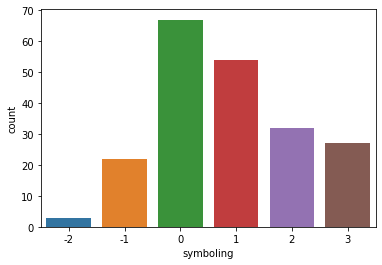

In [23]:
sns.countplot(data.symboling)

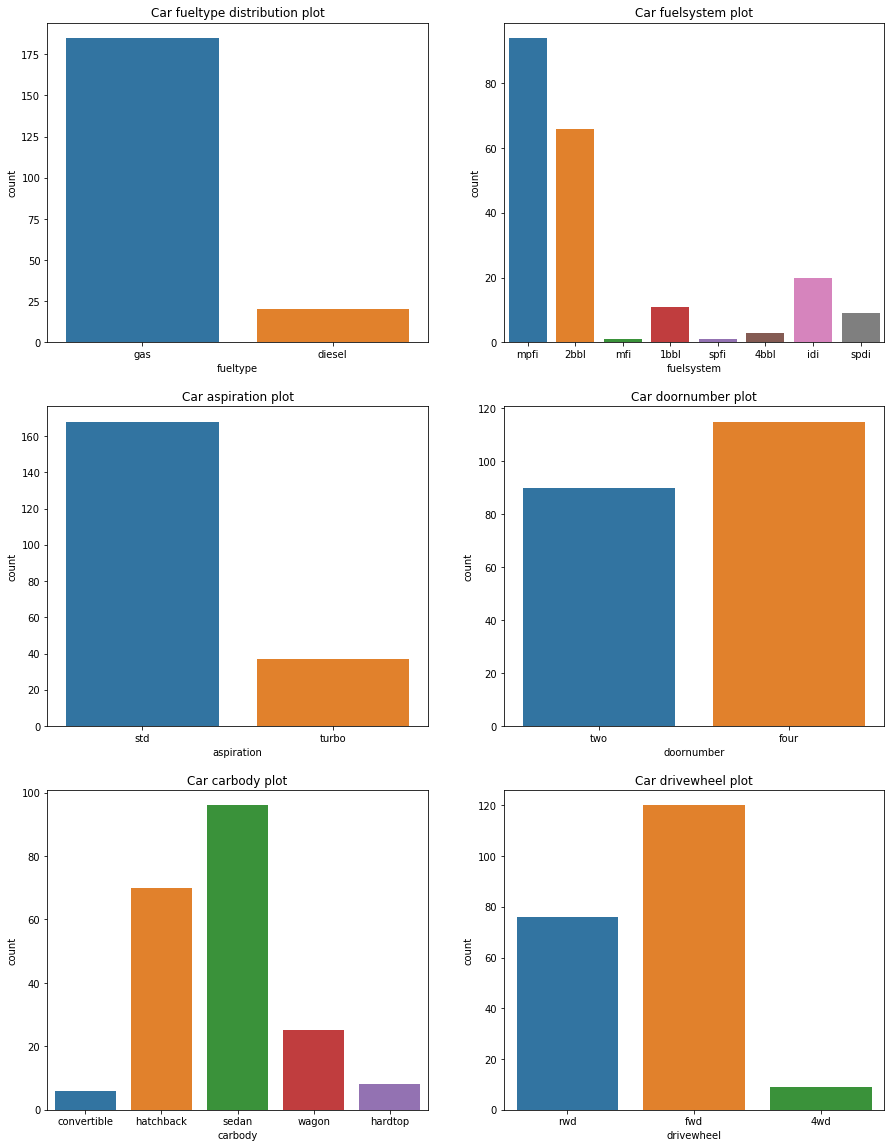

In [24]:
fig = plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
plt.title('Car fueltype distribution plot')
sns.countplot(data.fueltype) # Gas type engines are predominant

plt.subplot(3,2,2)
plt.title('Car fuelsystem plot')
sns.countplot(data.fuelsystem) # Multi point fuel injection are the most preferred also because they are latest.

plt.subplot(3,2,3)
plt.title('Car aspiration plot')
sns.countplot(data.aspiration) # Most of the engines are standard

plt.subplot(3,2,4)
plt.title('Car doornumber plot')
sns.countplot(data.doornumber) # Since, most are standard, there are four doors in the car

plt.subplot(3,2,5)
plt.title('Car carbody plot')
sns.countplot(data.carbody) # Sedan is the most preferred car type

plt.subplot(3,2,6)
plt.title('Car drivewheel plot')
sns.countplot(data.drivewheel) # forward wheel drive are most prominant which indicates why prices are low



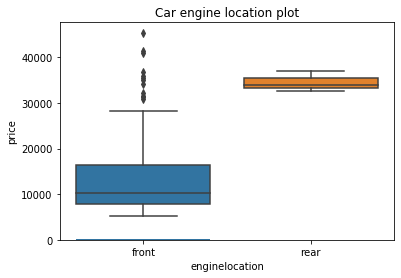

In [25]:
plt.title('Car engine location plot')
sns.countplot(data.enginelocation) # Mostlty there are front car engines and are cheap with some outliers (high end cars)
sns.boxplot(x=data.enginelocation, y = data.price)

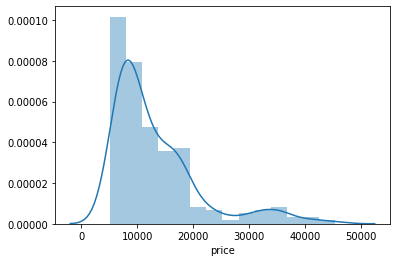

In [26]:
sns.distplot(data.price)

# The plot is right skewed, so it shows that most car prices range from 5000 to 20,000

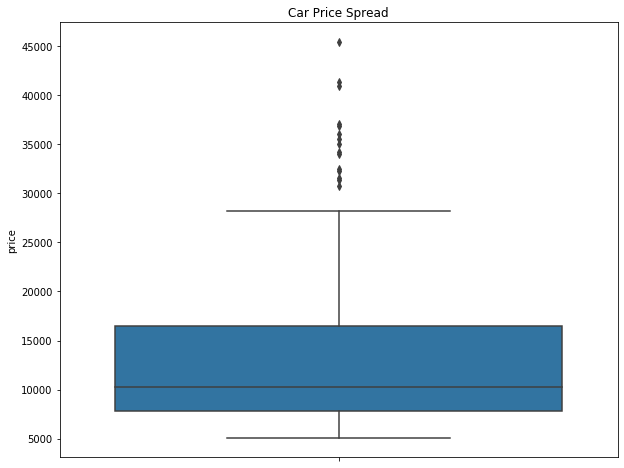

In [27]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=data.price) # There is a healthy spread in prices

In [28]:
data.price.describe() 
# There is a major difference in the mean and median of prices indictaing a large spread having 75% of the values below 
# 16,500 and 25% values between 16k and 45k

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [29]:
#data[data.price > 20000]

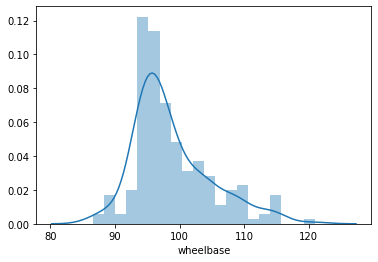

In [30]:
sns.distplot(data.wheelbase, bins= 20)

In [31]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


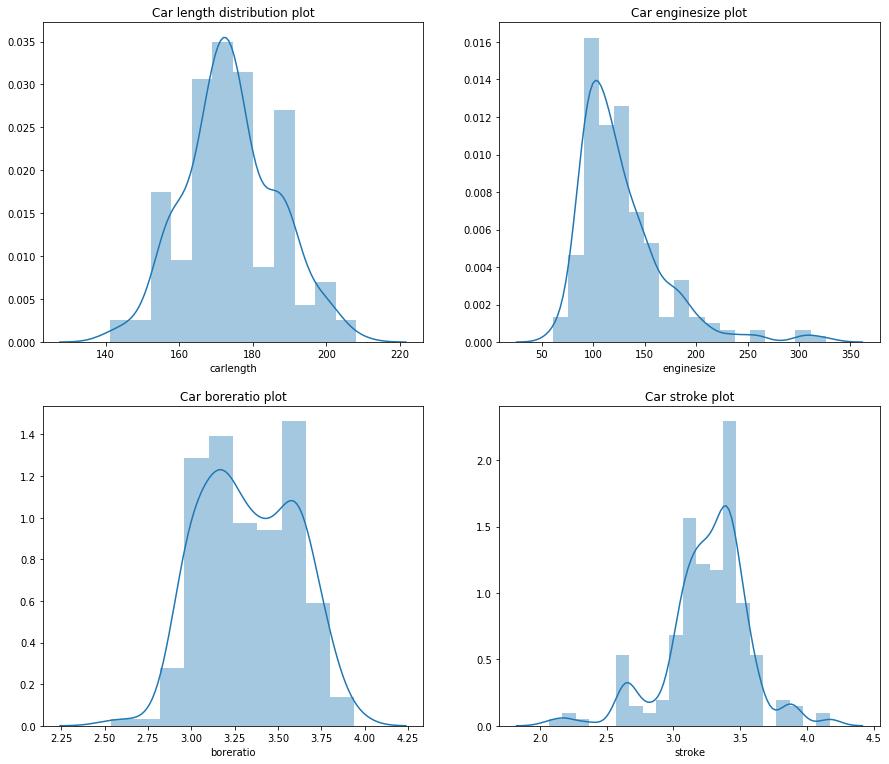

In [32]:
fig = plt.figure(figsize=(15,20),edgecolor='b')

plt.subplot(3,2,1)
plt.title('Car length distribution plot')
sns.distplot(data.carlength) 


plt.subplot(3,2,2)
plt.title('Car enginesize plot')
sns.distplot(data.enginesize) 


plt.subplot(3,2,3)
plt.title('Car boreratio plot')
sns.distplot(data.boreratio) 


plt.subplot(3,2,4)
plt.title('Car stroke plot')
sns.distplot(data.stroke) 


### Bivariate Analysis

In [33]:
data.head() # We will check how different factors affect the pricing of the car

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


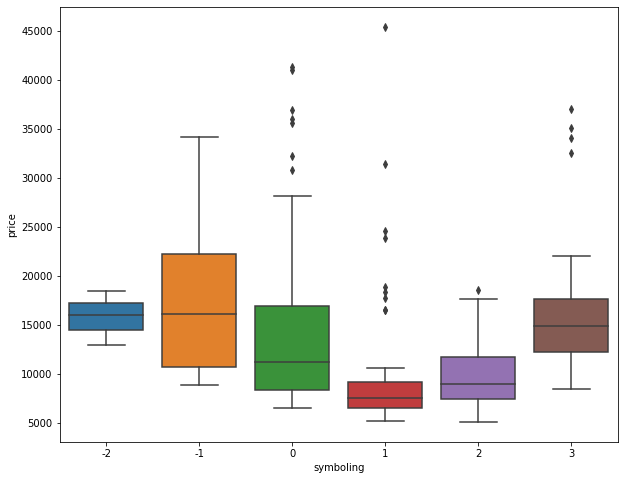

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x= data.symboling, y = data.price)

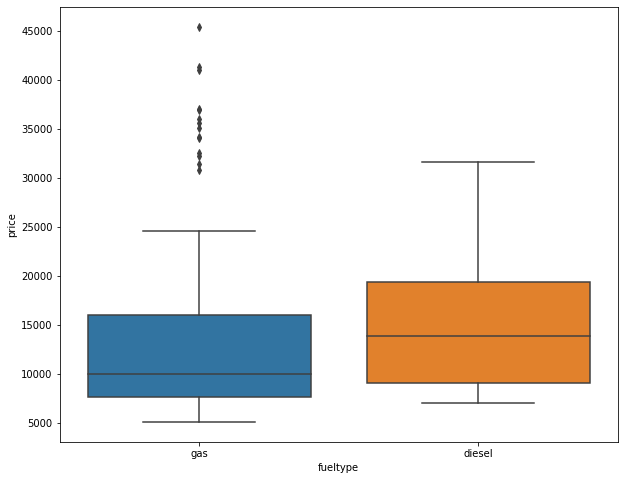

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(x= data.fueltype, y = data.price)

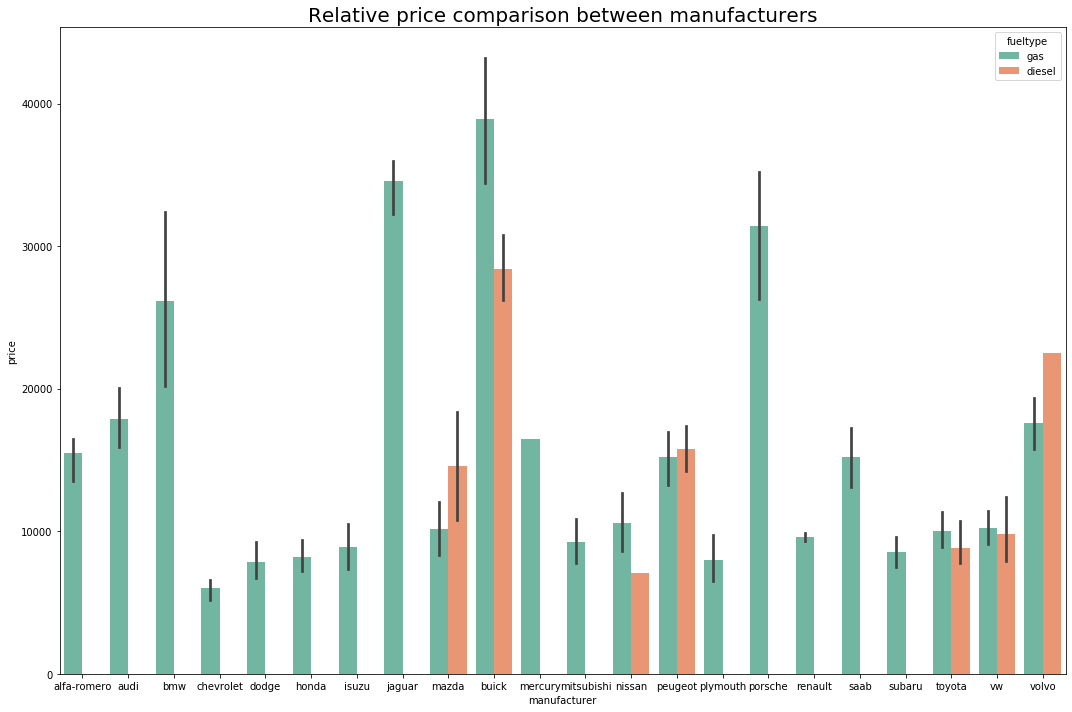

In [36]:
plt.figure(figsize=(15,10))
plt.title('Relative price comparison between manufacturers', fontsize = 20 )
sns.barplot(x= data.manufacturer, y = data.price, hue=data.fueltype, palette= 'Set2' )
plt.tight_layout()

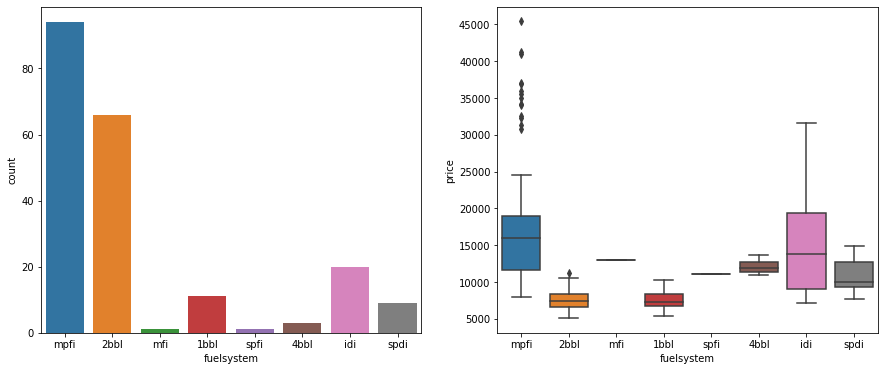

In [59]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
sns.countplot(data.fuelsystem)


plt.subplot(1,2,2)
sns.boxplot(x = data.fuelsystem, y = data.price)

# While ohc is the dominant enginetype, ohcv appears to be costlier than the rest



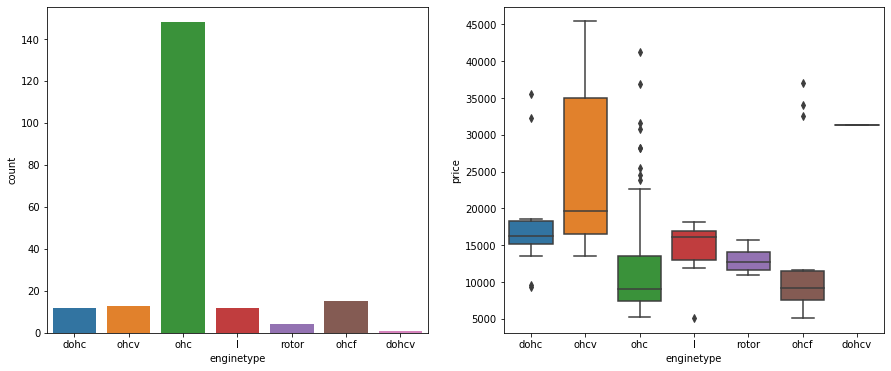

In [37]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
sns.countplot(data.enginetype)


plt.subplot(1,2,2)
sns.boxplot(x = data.enginetype, y = data.price)

# While ohc is the dominant enginetype, ohcv appears to be costlier than the rest



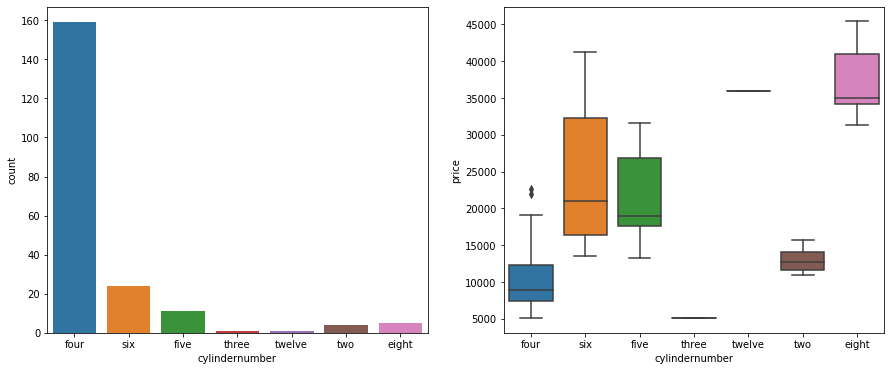

In [38]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
sns.countplot(data.cylindernumber)


plt.subplot(1,2,2)
sns.boxplot(x = data.cylindernumber, y = data.price)

# It doesn't have much affect on the pricing

In [39]:
data.describe() # We will check how different factors affect the pricing of the car

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [40]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [42]:
cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg' ]


def regplots(cols):
    
    for i in range(len(cols)):
        plt.subplot(7,2, i+1)
        plt.title(cols[i] + ' vs price')
        sns.regplot(x = eval('data' + '.' + cols[i]), y = data.price)
    
# We can clearly see what all predictors are positively correlated with pricing of the automobiles

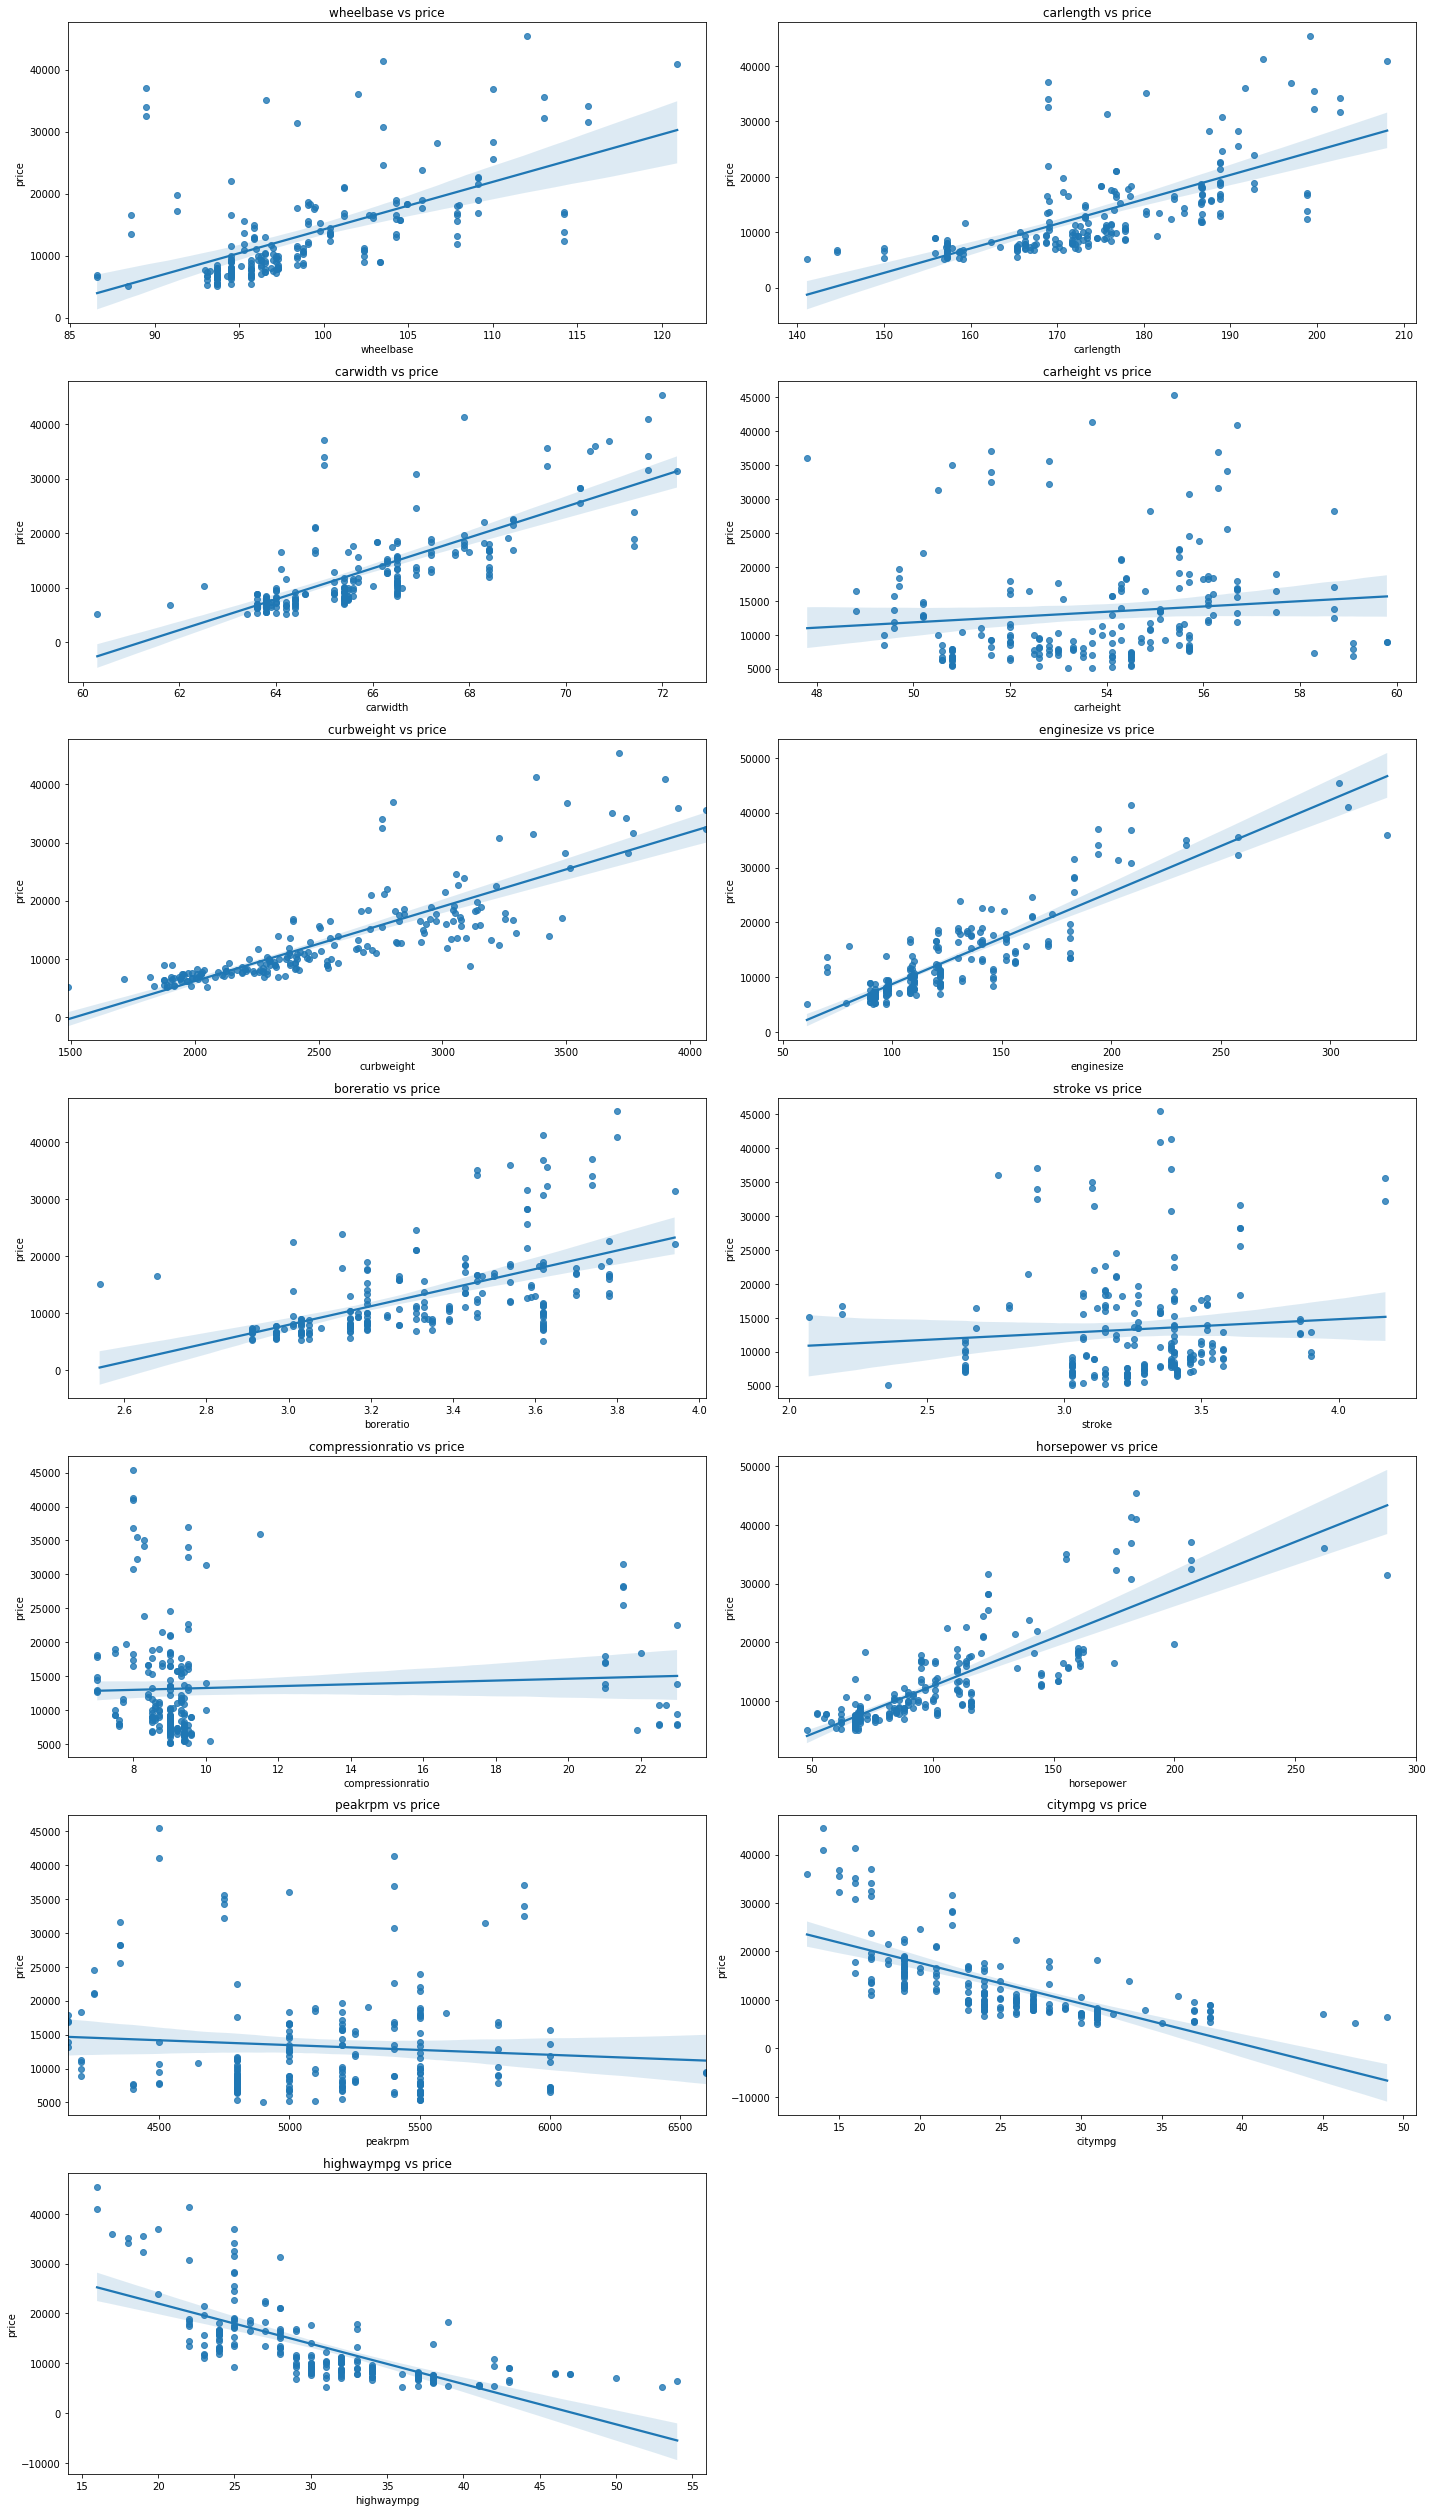

In [43]:
plt.figure(figsize=(20,35))

regplots(cols)

plt.tight_layout()

# Predictors that are not important are - car height,stroke, compression ratio, peak rpm, highway and city mpg

In [44]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [45]:
# So new data frame has reduced number of features

data_new = data[['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [46]:
data_new.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


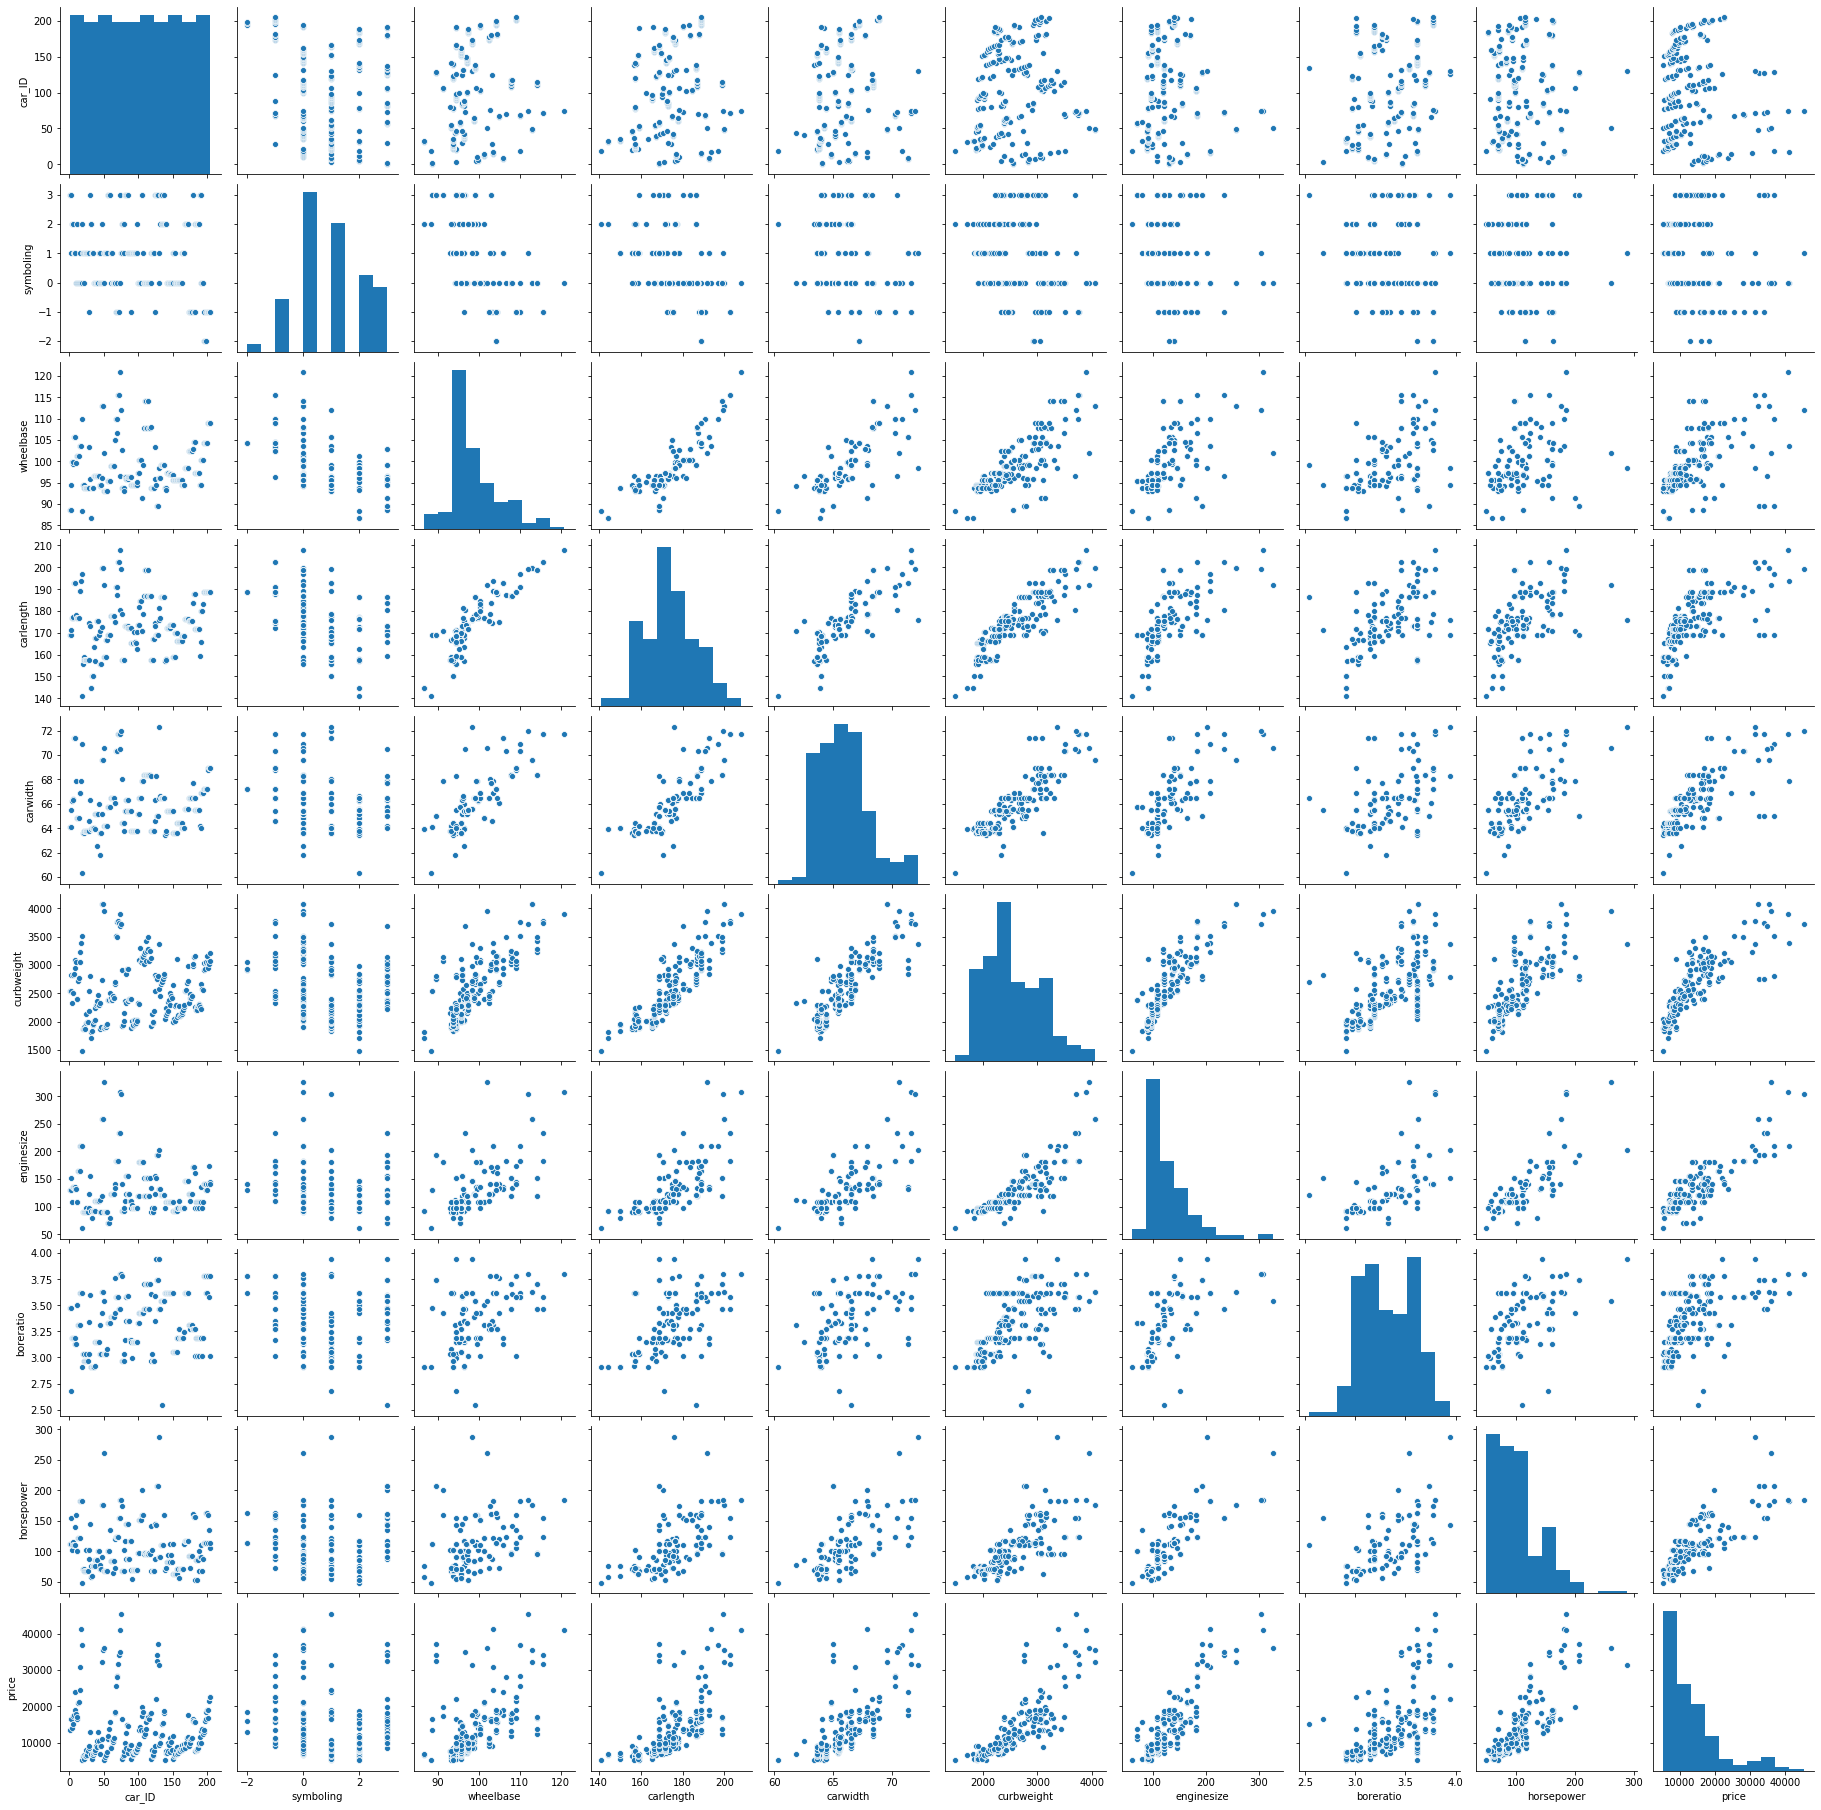

In [47]:
sns.pairplot(data_new)

In [48]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Feature Engineering 
#### Deriving new features to better model the data

In [49]:
# Torque is defined as the amount of work an engine does to move the crankshaft which then translates into linear distance 
# of the car. It is the ability of the engine to do work, higher the torque better the engine and hence costlier the car.
# And we see below, it is highly significant derived feature. 

data.insert(10, 'torque', pd.Series(data = (data.horsepower * 5252) / data.peakrpm, index=data.index))

In [50]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'torque', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

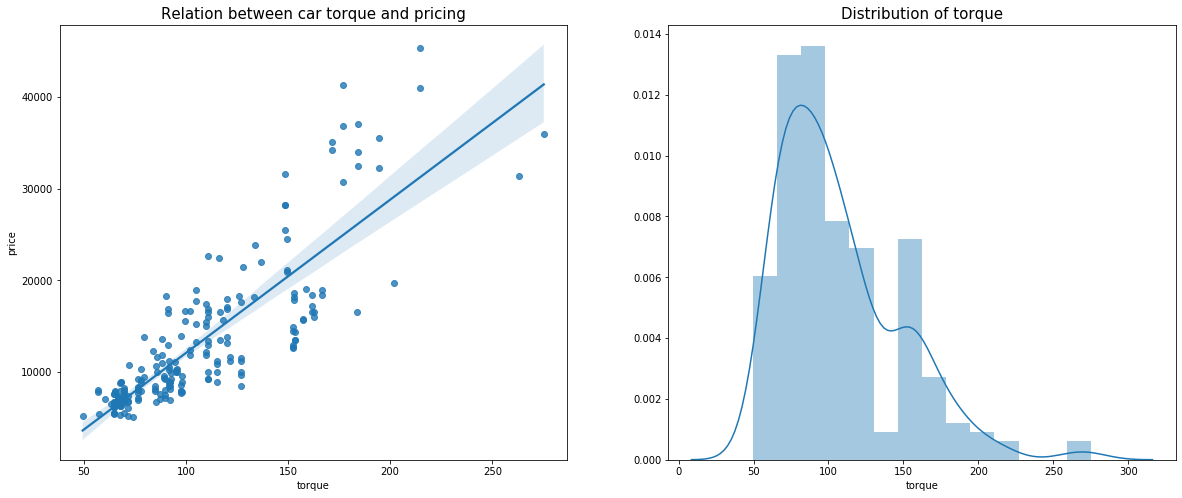

In [51]:
fig = plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Relation between car torque and pricing', fontsize = 15)
sns.regplot(x = data.torque, y = data.price)


plt.subplot(1,2,2)
plt.title('Distribution of torque', fontsize = 15)
sns.distplot(data.torque)

In [54]:
data.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [55]:
# Fuel economy is defined as the average fuel consumption when the car is driven in city and in highway.

data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

In [57]:
# Selecting significant predictors for model building
data.drop(columns=['car_ID','manufacturer','doornumber','carheight','compressionratio','stroke','citympg','highwaympg'], axis=1,inplace=True)

In [60]:
data.drop(columns=['fuelsystem', 'peakrpm'], axis=1, inplace=True)

In [61]:
data.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fueleconomy
0,3,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,3,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,1,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,2,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,2,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


## Model Building

In [63]:
cars_lr = data.copy()

In [69]:
# Getting dummy variables for the categorical values

def get_dummies(x):
    global cars_lr
    temp_df = pd.get_dummies(eval('cars_lr' + '.' + x), drop_first=True)
    cars_lr = pd.concat([cars_lr, temp_df], axis=1)
    cars_lr.drop([x],axis=1,inplace=True)
    
    return cars_lr
    

In [67]:
dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel','enginelocation', 'enginetype','cylindernumber']

In [70]:
for i in dummies_list:
    get_dummies(i)

In [72]:
cars_lr.head()

,symboling,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,88.6,116.594400,168.8,64.1,2548,130,3.47,111,13495.0,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,116.594400,168.8,64.1,2548,130,3.47,111,16500.0,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,161.761600,171.2,65.5,2823,152,2.68,154,16500.0,...,0,0,1,0,0,0,1,0,0,0
3,2,99.8,97.400727,176.6,66.2,2337,109,3.19,102,13950.0,...,1,0,0,0,0,1,0,0,0,0
4,2,99.4,109.814545,176.6,66.4,2824,136,3.19,115,17450.0,...,1,0,0,0,1,0,0,0,0,0


In [73]:
cars_lr.shape

(205, 32)

In [74]:
cars_lr.columns

Index(['symboling', 'wheelbase', 'torque', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price',
       'fueleconomy', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')